# Face tracking pipeline

The following example illustrates how to use the `facenet_pytorch` python package to perform face detection and tracking on an image dataset using MTCNN.

In [15]:

from facenet_pytorch import MTCNN
import torch
import numpy as np
import mmcv, cv2
from PIL import Image, ImageDraw
from IPython import display


In [16]:
# lib used to cut vedio
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

In [17]:
### lib used to download youtube vedios (can only run once). Download to this file's place
# from pytube import YouTube


# url = "https://youtu.be/s46iOQFHGqs"
# download_ytbVedio = YouTube(url).streams.first().download()
# download_ytbVedio

#### Determine if an nvidia GPU is available

In [18]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cpu


#### Define MTCNN module

Note that, since MTCNN is a collection of neural nets and other code, the device must be passed in the following way to enable copying of objects when needed internally.

See `help(MTCNN)` for more details.

In [19]:
mtcnn = MTCNN(keep_all=True, device=device)

#### Get a sample video

We begin by loading a video with some faces in it. The `mmcv` PyPI package by mmlabs is used to read the video frames (it can be installed with `pip install mmcv`). Frames are then converted to PIL images.

In [20]:
# cut 40 mins vedio in 1 min timeframe
ffmpeg_extract_subclip("/Users/tankaiyan/Desktop/YouTube.mp4", 60, 120, targetname="cut.mp4")

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [21]:
video = mmcv.VideoReader('cut.mp4')
frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]

display.Video('cut.mp4', width=640)

#### Run video through MTCNN

We iterate through each frame, detect faces, and draw their bounding boxes on the video frames.

In [22]:
# view how frame looks like
w = 0

for i, frame in enumerate(frames):
    print(f'{i}  {frame}')
    w += 1
    if w>5:
        break

h = 0

for i, frame in enumerate(frames):
    print(f'{frame.copy()}')
    h += 1
    if h>5:
        break
   

0  <PIL.Image.Image image mode=RGB size=640x360 at 0x19B4FF438>
1  <PIL.Image.Image image mode=RGB size=640x360 at 0x19B4FF4A8>
2  <PIL.Image.Image image mode=RGB size=640x360 at 0x19B4FF518>
3  <PIL.Image.Image image mode=RGB size=640x360 at 0x19B4FF588>
4  <PIL.Image.Image image mode=RGB size=640x360 at 0x19B4FF5F8>
5  <PIL.Image.Image image mode=RGB size=640x360 at 0x19B4FF668>
<PIL.Image.Image image mode=RGB size=640x360 at 0x19B4FF128>
<PIL.Image.Image image mode=RGB size=640x360 at 0x19B4FF128>
<PIL.Image.Image image mode=RGB size=640x360 at 0x19B4FF128>
<PIL.Image.Image image mode=RGB size=640x360 at 0x19B4FF128>
<PIL.Image.Image image mode=RGB size=640x360 at 0x19B4FF128>
<PIL.Image.Image image mode=RGB size=640x360 at 0x19B4FF128>


In [23]:
#mtcnn = MTCNN(image_size=640*360, margin=0) # this line is essential

In [27]:
frames_tracked = []
new_boxes = []
for i, frame in enumerate(frames): # fcn enumerate() take an iterated object and add index to it
    print('\rTracking frame: {}'.format(i + 1), end='')
    
    # Detect faces
    boxes, _ = mtcnn.detect(frame) # original was mtcnn.detect(frame)
    
    # Draw faces
    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    for box in boxes:
        m = frame.crop(box)
        new_box = m.resize((32,32))
        print(new_box)
        new_boxes.append(new_box)
#         draw.rectangle(new_box.tolist(), outline=(255, 0, 0), width=6)
    
    # Add to frame list
    frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))

print('\nDone')

Tracking frame: 1<PIL.Image.Image image mode=RGB size=32x32 at 0x219601080>
<PIL.Image.Image image mode=RGB size=32x32 at 0x19B45C128>
<PIL.Image.Image image mode=RGB size=32x32 at 0x2196010F0>
<PIL.Image.Image image mode=RGB size=32x32 at 0x219601320>
<PIL.Image.Image image mode=RGB size=32x32 at 0x219601390>
<PIL.Image.Image image mode=RGB size=32x32 at 0x219601400>
Tracking frame: 2<PIL.Image.Image image mode=RGB size=32x32 at 0x219601470>
<PIL.Image.Image image mode=RGB size=32x32 at 0x2196015C0>
<PIL.Image.Image image mode=RGB size=32x32 at 0x219601630>
<PIL.Image.Image image mode=RGB size=32x32 at 0x2196016A0>
<PIL.Image.Image image mode=RGB size=32x32 at 0x219601710>
<PIL.Image.Image image mode=RGB size=32x32 at 0x219601780>
Tracking frame: 3<PIL.Image.Image image mode=RGB size=32x32 at 0x219601860>
<PIL.Image.Image image mode=RGB size=32x32 at 0x219601940>
<PIL.Image.Image image mode=RGB size=32x32 at 0x2196019B0>
<PIL.Image.Image image mode=RGB size=32x32 at 0x219601A20>
<PIL.

Tracking frame: 24<PIL.Image.Image image mode=RGB size=32x32 at 0x22E23E160>
<PIL.Image.Image image mode=RGB size=32x32 at 0x20D8BB128>
<PIL.Image.Image image mode=RGB size=32x32 at 0x22E23E2B0>
<PIL.Image.Image image mode=RGB size=32x32 at 0x22E23E390>
<PIL.Image.Image image mode=RGB size=32x32 at 0x22E23E400>
<PIL.Image.Image image mode=RGB size=32x32 at 0x22E23E470>
Tracking frame: 25<PIL.Image.Image image mode=RGB size=32x32 at 0x22E23E4E0>
<PIL.Image.Image image mode=RGB size=32x32 at 0x22E23E5C0>
<PIL.Image.Image image mode=RGB size=32x32 at 0x22E23E6A0>
<PIL.Image.Image image mode=RGB size=32x32 at 0x22E23E710>
<PIL.Image.Image image mode=RGB size=32x32 at 0x22E23E780>
<PIL.Image.Image image mode=RGB size=32x32 at 0x22E23E7F0>
Tracking frame: 26<PIL.Image.Image image mode=RGB size=32x32 at 0x22E23E860>
<PIL.Image.Image image mode=RGB size=32x32 at 0x20D8BB240>
<PIL.Image.Image image mode=RGB size=32x32 at 0x22E23E9B0>
<PIL.Image.Image image mode=RGB size=32x32 at 0x22E23EA90>
<P

Tracking frame: 68<PIL.Image.Image image mode=RGB size=32x32 at 0x1A04469E8>
<PIL.Image.Image image mode=RGB size=32x32 at 0x1A0446AC8>
<PIL.Image.Image image mode=RGB size=32x32 at 0x1A0446B38>
<PIL.Image.Image image mode=RGB size=32x32 at 0x1A0446BA8>
<PIL.Image.Image image mode=RGB size=32x32 at 0x1A0446C18>
<PIL.Image.Image image mode=RGB size=32x32 at 0x1A0446C88>
Tracking frame: 69<PIL.Image.Image image mode=RGB size=32x32 at 0x1A0446CF8>
<PIL.Image.Image image mode=RGB size=32x32 at 0x1A0446DD8>
<PIL.Image.Image image mode=RGB size=32x32 at 0x1A0446E48>
<PIL.Image.Image image mode=RGB size=32x32 at 0x1A0446EB8>
<PIL.Image.Image image mode=RGB size=32x32 at 0x1A0446F28>
<PIL.Image.Image image mode=RGB size=32x32 at 0x1A0446F98>
Tracking frame: 70<PIL.Image.Image image mode=RGB size=32x32 at 0x1A0446FD0>
<PIL.Image.Image image mode=RGB size=32x32 at 0x1A0446D68>
<PIL.Image.Image image mode=RGB size=32x32 at 0x1A0452198>
<PIL.Image.Image image mode=RGB size=32x32 at 0x1A0452208>
<P

KeyboardInterrupt: 

#### Display detections

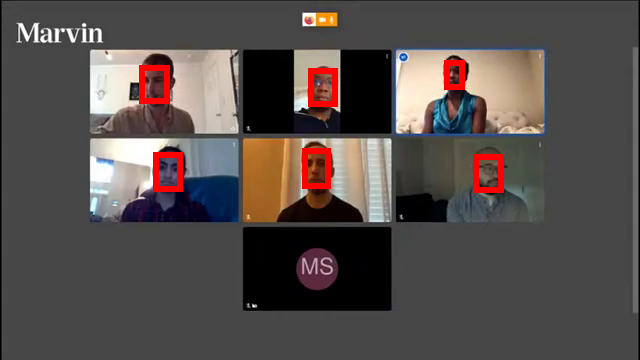

In [31]:
d = display.display(frames_tracked[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
except KeyboardInterrupt:
    pass

#### Save tracked video

In [7]:
dim = frames_tracked[0].size
fourcc = cv2.VideoWriter_fourcc(*'FMP4')    
video_tracked = cv2.VideoWriter('video_tracked.mp4', fourcc, 25.0, dim)
for frame in frames_tracked:
    video_tracked.write(cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR))
video_tracked.release()